In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root_scalar, fsolve
from scipy.stats import rv_continuous

In [96]:
def E_0(s):
  return 26 if s < 0.4 else 44 - 17 * (s - 1.46)**2
  
def normalizationFactor(E_min, s):
  return - 1/( ( (0.89*E_0(s) - 1.2)/(E_0(s) + E_min) )**s * (1 + 10**(-4) * s * E_min)**(-2) )

def cdf(E, E_min, s):
  return normalizationFactor(E_min, s) * ( ( (0.89*E_0(s) - 1.2)/(E_0(s) + E) )**s * (1 + 10**(-4) * s * E)**(-2) - ( (0.89*E_0(s) - 1.2)/(E_0(s) + E_min) )**s * (1 + 10**(-4) * s * E_min)**(-2) )

def cdfXLog(E, E_min, s):
  return normalizationFactor(E_min, s) * ( ( (0.89*E_0(s) - 1.2)/(E_0(s) + 10**E) )**s * (1 + 10**(-4) * s * 10**E)**(-2) - ( (0.89*E_0(s) - 1.2)/(E_0(s) + E_min) )**s * (1 + 10**(-4) * s * E_min)**(-2) )

In [85]:
es = np.linspace(10, 100000, 1000)

In [73]:
esl = np.logspace(1, 5, num=1000)

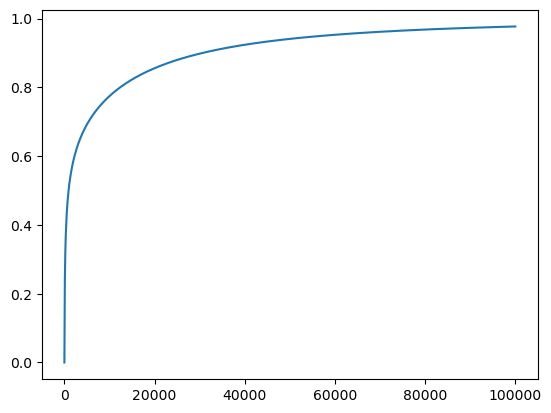

In [117]:
plt.plot(es, cdf(es, 10, 0.2))

In [130]:
test = np.linspace(1, 5, 1000)

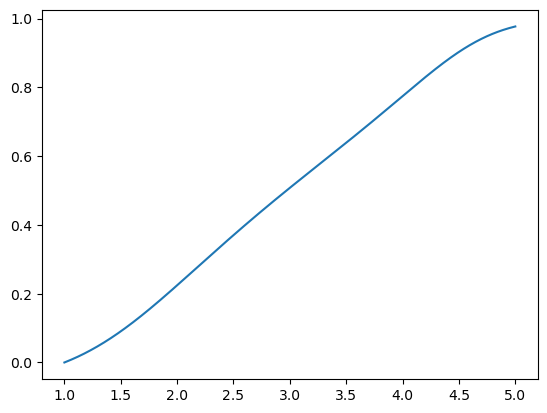

In [138]:
plt.plot(test, cdfXLog(test, 10, 0.2))

In [141]:
def realCDF(E, r=0):
  return cdfXLog(E, 10, 0.2) - r

def randGen(num=1):
  res = []
  r_vals = np.random.rand(num)
  for r in r_vals:
    res.append(fsolve(lambda x: realCDF(x, r=r), 1)[0])
  print(r_vals)
  print(res)
  return res

In [142]:
vals = randGen(10000)

[0.1849237  0.14138378 0.65099966 ... 0.79000082 0.78566539 0.39759853]
[1.8622697739397012, 1.7034852581498918, 3.545234343542381, 2.5094560052994654, 4.249086561802871, 4.076206881279504, 1.7354177113165417, 2.1515709884121974, 3.126763414901313, 2.02894149921396, 1.9127490808981038, 4.123008402421274, 3.8032676841183455, 2.554775647096242, 1.2291343004210669, 1.9859037208812511, 4.602882917990671, 3.299288324248191, 3.7524678148799664, 4.392709959396117, 2.5721485286083077, 2.9414177820907788, 3.0461153358038238, 3.0846975848821963, 2.825232010714572, 2.030335936333569, 3.629104296697937, 1.3503091846608186, 2.600657470701507, 4.143887857019009, 1.713011516059482, 3.918641397671569, 2.2630269387472923, 2.947928321318445, 1.2770181169240244, 2.1058340901244263, 2.031000016971333, 2.4634323956024766, 1.4544339433622695, 1.629556144105061, 1.3203775238896045, 2.3574144917962845, 3.549929164286155, 3.2188239716937543, 2.2312748590280944, 2.8709365613293643, 3.282436998364626, 3.10376050

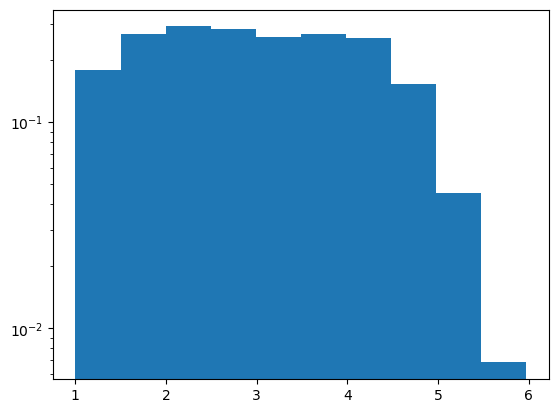

In [143]:
h = plt.hist(vals, density=True)
plt.yscale('log')